In [23]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras import applications

# dimensions of our images.
img_width, img_height = 185, 278

top_model_weights_path = 'bottleneck_fc_2_model.h5'
train_data_dir = 'Posters 660/Train'
validation_data_dir = 'Posters 660/Validation'
nb_train_samples = 396
nb_validation_samples = 264
epochs = 50
batch_size = 36 # difference in this version: train the VGG using a larger batch size


def save_bottlebeck_features():
    datagen = ImageDataGenerator(rescale=1. / 255)

    # build the VGG16 network
    model = applications.VGG16(include_top=False, weights='imagenet')

    generator = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode=None,
        shuffle=False)
    bottleneck_features_train = model.predict_generator(
        generator, nb_train_samples // batch_size)
    np.save(open('bottleneck_features_2_train.npy', 'w'),
            bottleneck_features_train)

    generator = datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode=None,
        shuffle=False)
    bottleneck_features_validation = model.predict_generator(
        generator, nb_validation_samples // batch_size)
    np.save(open('bottleneck_features_2_validation.npy', 'w'),
            bottleneck_features_validation)

save_bottlebeck_features()

Found 396 images belonging to 3 classes.
Found 264 images belonging to 3 classes.


In [82]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras import applications
from keras.optimizers import SGD
from keras.optimizers import Adam
from keras import optimizers

top_model_weights_path = 'bottleneck_fc_model.h5'
train_data_dir = 'Posters 660/Train'
validation_data_dir = 'Posters 660/Validation'
nb_train_samples = 396
nb_validation_samples = 264
epochs = 100
batch_size = 36 

sgd = SGD(lr=0.001, decay=0.00001) # lower learning rate

def train_top_model():
    train_data = np.load(open('bottleneck_features_train.npy'))
    train_labels = np.array(
        [0] * (nb_train_samples / 2) + [1] * (nb_train_samples / 2))

    validation_data = np.load(open('bottleneck_features_validation.npy'))
    validation_labels = np.array(
        [0] * (nb_validation_samples / 2) + [1] * (nb_validation_samples / 2))

    model = Sequential()
    
#add more layers, eliminate dropout
    model.add(Flatten(input_shape=train_data.shape[1:]))
    model.add(Dense(256, activation='relu')) 
    model.add(Dense(512, activation='relu')) 
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=sgd,
                  loss='binary_crossentropy', metrics=['accuracy'])

    model.fit(train_data, train_labels,
              epochs=epochs,
              batch_size=batch_size,
              validation_data=(validation_data, validation_labels))
    model.save_weights(top_model_weights_path)

train_top_model()

Train on 396 samples, validate on 264 samples
Epoch 1/100
396/396 [==============================] - 3s - loss: 0.7249 - acc: 0.5051 - val_loss: 0.6892 - val_acc: 0.5568
Epoch 2/100
396/396 [==============================] - 0s - loss: 0.7244 - acc: 0.4874 - val_loss: 0.6832 - val_acc: 0.5720
Epoch 3/100
396/396 [==============================] - 0s - loss: 0.6905 - acc: 0.5631 - val_loss: 0.6801 - val_acc: 0.5720
Epoch 4/100
396/396 [==============================] - 0s - loss: 0.6915 - acc: 0.5505 - val_loss: 0.6745 - val_acc: 0.6250
Epoch 5/100
396/396 [==============================] - 0s - loss: 0.7064 - acc: 0.5404 - val_loss: 0.6710 - val_acc: 0.6515
Epoch 6/100
396/396 [==============================] - 0s - loss: 0.6698 - acc: 0.6086 - val_loss: 0.6671 - val_acc: 0.6515
Epoch 7/100
396/396 [==============================] - 0s - loss: 0.6645 - acc: 0.5859 - val_loss: 0.6639 - val_acc: 0.6667
Epoch 8/100
396/396 [==============================] - 0s - loss: 0.6627 - acc: 0.6061

In [83]:
train_data = np.load(open('bottleneck_features_train.npy'))
# the features were saved in order, so recreating the labels is easy
train_labels = np.array([0] * 198 + [1] * 198) #change number of labels here

validation_data = np.load(open('bottleneck_features_validation.npy'))
validation_labels = np.array([0] * 132 + [1] * 132)

model = Sequential()
model.add(Flatten(input_shape=train_data.shape[1:]))
model.add(Dense(256, activation='relu')) 
model.add(Dense(512, activation='relu')) 
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=sgd,
              loss='binary_crossentropy',
              metrics=['accuracy'])

hist = model.fit(train_data, train_labels,
          epochs=epochs,
          batch_size=batch_size,
          validation_data=(validation_data, validation_labels))

model.save_weights('bottleneck_fc_model_2.h5')

Train on 396 samples, validate on 264 samples
Epoch 1/100
396/396 [==============================] - 2s - loss: 0.7264 - acc: 0.5051 - val_loss: 0.6945 - val_acc: 0.5038
Epoch 2/100
396/396 [==============================] - 0s - loss: 0.6980 - acc: 0.5631 - val_loss: 0.6908 - val_acc: 0.5227
Epoch 3/100
396/396 [==============================] - 0s - loss: 0.7030 - acc: 0.5202 - val_loss: 0.6876 - val_acc: 0.5720
Epoch 4/100
396/396 [==============================] - 0s - loss: 0.6778 - acc: 0.5480 - val_loss: 0.6861 - val_acc: 0.5606
Epoch 5/100
396/396 [==============================] - 0s - loss: 0.6841 - acc: 0.5859 - val_loss: 0.6816 - val_acc: 0.5795
Epoch 6/100
396/396 [==============================] - 0s - loss: 0.6657 - acc: 0.5859 - val_loss: 0.6798 - val_acc: 0.5833
Epoch 7/100
396/396 [==============================] - 0s - loss: 0.6657 - acc: 0.5934 - val_loss: 0.6768 - val_acc: 0.5947
Epoch 8/100
396/396 [==============================] - 0s - loss: 0.6595 - acc: 0.6237

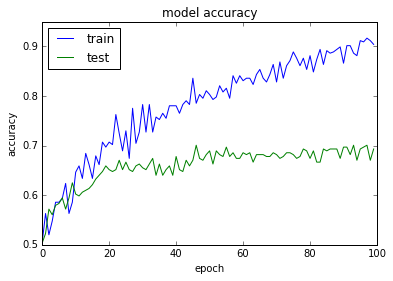

In [84]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')